In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

import theano
import theano.tensor as T

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

In [4]:
from pymc3_models.models.HierarchicalLogisticRegression import HierarchicalLogisticRegression

In [5]:
num_pred = 2
num_samples = 700000
num_categories = 2

In [6]:
alphas = 5 * np.random.randn(num_categories) + 5 # mu_alpha = sigma_alpha = 5
betas = 10 * np.random.randn(num_categories, num_pred) + 10 # mu_beta = sigma_beta = 10

In [7]:
alphas

array([ 5.24424268,  5.53086332])

In [8]:
betas

array([[ 19.03657309,  -7.47583001],
       [ 21.62208973,  19.36413106]])

In [9]:
def numpy_invlogit(x):
    return 1 / (1 + np.exp(-x))

In [10]:
x_a = np.random.randn(num_samples, num_pred)
y_a = np.random.binomial(1, numpy_invlogit(alphas[0] + np.sum(betas[0] * x_a, 1)))
x_b = np.random.randn(num_samples, num_pred)
y_b = np.random.binomial(1, numpy_invlogit(alphas[1] + np.sum(betas[1] * x_b, 1)))

X = np.concatenate([x_a, x_b])
Y = np.concatenate([y_a, y_b])
cats = np.concatenate([
    np.zeros(num_samples, dtype=np.int),
    np.ones(num_samples, dtype=np.int)
])

In [11]:
HLM1 = HierarchicalLogisticRegression()

In [12]:
HLM1.fit(X, Y, cats, minibatch_size=2000, inference_args={'n': 350000})

advi
dict_keys(['n', 'minibatches'])


Average Loss = 140.16: 100%|██████████| 350000/350000 [15:24<00:00, 378.76it/s]
Finished [100%]: Average Loss = 140.13


HierarchicalLogisticRegression()

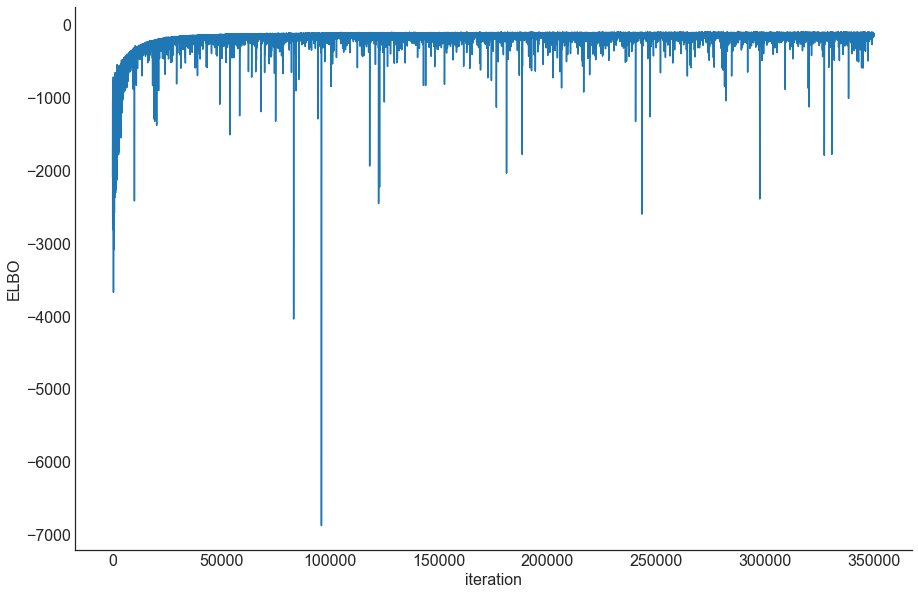

In [13]:
HLM1.plot_elbo()

In [14]:
summary(HLM1.advi_trace[1000:])


mu_alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  4.890            2.963            0.032            [-0.580, 11.081]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.973         2.902          4.872          6.891          10.748


mu_beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  11.355           8.410            0.094            [-4.849, 27.994]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -5.200         5.710          11.280         17.007         27.733


alpha:

  Mean             SD               MC Error         95% HPD interval
  --------------

In [15]:
alphas

array([ 5.24424268,  5.53086332])

In [16]:
betas

array([[ 19.03657309,  -7.47583001],
       [ 21.62208973,  19.36413106]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117eb9d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119fbe358>]], dtype=object)

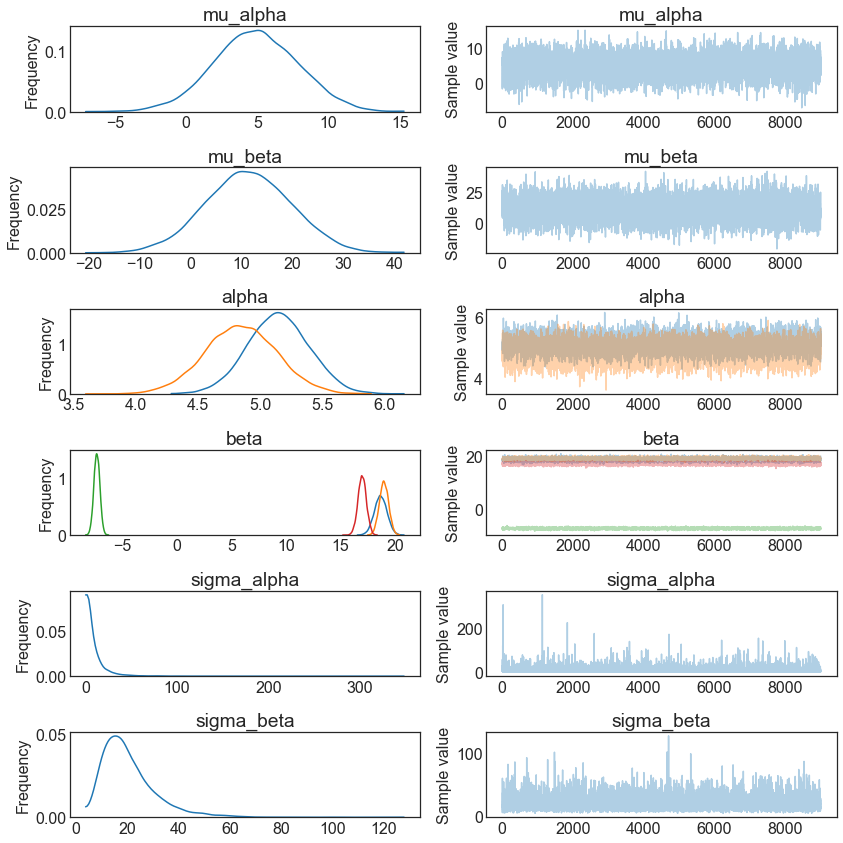

In [17]:
traceplot(HLM1.advi_trace[1000:])

In [ ]:
#probs = HLM1.predict_proba(X, cats)

In [ ]:
#pred = HLM1.predict(X, cats)

In [18]:
HLM1.score(X, Y, cats)

100%|██████████| 2000/2000 [06:37<00:00,  5.03it/s]


0.97753928571428572

In [21]:
!ls

HierarchicalLogisticRegression.ipynb test.ipynb


In [20]:
HLM1.save('pickle_jar/HLR_jar/')

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_jar/HLR_jar/advi_trace.pickle'

In [ ]:
HLM1.num_cats

In [ ]:
HLM2 = HierarchicalLogisticRegression()

In [ ]:
HLM2.load('HLR_jar/')

In [ ]:
HLM2.score(X, Y, cats)